In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import squarify
from pathlib import Path

In [2]:
SEED = 1
SAMPLE_RATE = 0.1

In [3]:
data_folder = Path("data/")
file_names = sorted(list(data_folder.glob('JC-*.csv')))

In [4]:
dfs = [pd.read_csv(file) for file in file_names]
df = pd.concat(dfs, ignore_index=True)

In [5]:
# convert 'started_at' and 'ended_at' columns to datetime objects
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# create a 'month' column for easy grouping
df['month'] = df['started_at'].dt.month

In [6]:
# calculate daily rides per month
daily_rides_per_month = df.groupby(df['started_at'].dt.to_period('D')).size()
daily_rides_per_month = daily_rides_per_month.reset_index(name='count')
daily_rides_per_month['month'] = daily_rides_per_month['started_at'].dt.month

Below shows the average number of daily rides per month. It provides insights into the seasonality of bike rides, indicating which months have higher demand. In this case, months 6 through 9 (June to September) have the highest number of rides, which suggests that these months have higher usage, possibly due to warmer weather and outdoor activities. Indeed, summer time seems more popular then winter time for biking

In [29]:
print("Average Daily Rides Per Month")
for i,val in enumerate(avg_daily_rides.index):
    print(val,  ": " , avg_daily_rides)
    
print("col 1:Month")
print("cold 2: # of Rides")

Average Daily Rides Per Month
1 :  month
1      863.290323
2     1139.678571
3     1666.806452
4     2084.266667
5     2596.193548
6     3443.300000
7     3500.064516
8     3717.129032
9     3474.900000
10    2888.967742
11    2423.633333
12    1549.064516
Name: count, dtype: float64
2 :  month
1      863.290323
2     1139.678571
3     1666.806452
4     2084.266667
5     2596.193548
6     3443.300000
7     3500.064516
8     3717.129032
9     3474.900000
10    2888.967742
11    2423.633333
12    1549.064516
Name: count, dtype: float64
3 :  month
1      863.290323
2     1139.678571
3     1666.806452
4     2084.266667
5     2596.193548
6     3443.300000
7     3500.064516
8     3717.129032
9     3474.900000
10    2888.967742
11    2423.633333
12    1549.064516
Name: count, dtype: float64
4 :  month
1      863.290323
2     1139.678571
3     1666.806452
4     2084.266667
5     2596.193548
6     3443.300000
7     3500.064516
8     3717.129032
9     3474.900000
10    2888.967742
11    2423.633

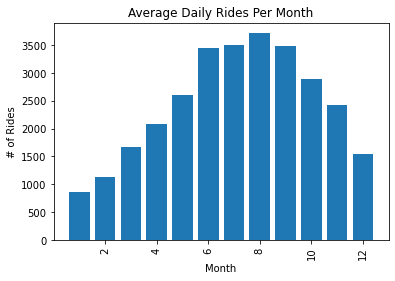

In [7]:
# plot average daily rides per month
avg_daily_rides = daily_rides_per_month.groupby('month')['count'].mean()
plt.bar(avg_daily_rides.index, avg_daily_rides)
plt.title('Average Daily Rides Per Month')
plt.ylabel('# of Rides')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.show()

This plot compares the daily rides per month, showing the variations and trends for each month. The plot helps us understand the consistency of bike usage within a month and observe any patterns that may emerge. For example, we can see if specific months have higher variability in daily rides, which can be useful for further investigation and understanding the factors influencing these fluctuations.

From the graph we can see that the least busy months also have lower variability. An idea could be that those months have a more inelastic demand. People that bike in winter time are less discouraged by bad weather and probably use citibike as the primary commuting method. During summer, where there's higher demand, supply is more elastic. Seasonal riders might not use bikes as primary transporation method and are more dependent on weather conditions.

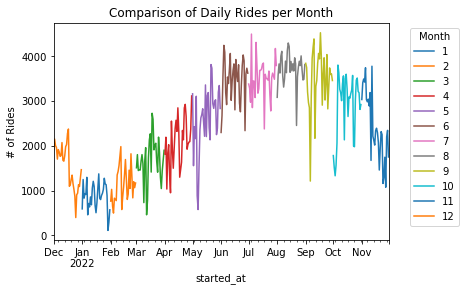

In [8]:
# plot daily rides per month
daily_rides_pivot = daily_rides_per_month.pivot_table(index='started_at', columns='month', values='count')
daily_rides_pivot.plot(title='Comparison of Daily Rides per Month', ylabel='# of Rides')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [9]:
# calculate rush hour and off-hour rides
rush_hour_morning = df[df['started_at'].dt.hour.between(7, 9)]
rush_hour_evening = df[df['started_at'].dt.hour.between(16, 19)]
rush_hour_df = pd.concat([rush_hour_morning, rush_hour_evening])
off_hour_df = df.drop(rush_hour_df.index)

In [10]:
# calculate start station counts for rush hour and off-hour
rush_hour_counts = rush_hour_df['start_station_name'].value_counts()
off_hour_counts = off_hour_df['start_station_name'].value_counts()

In [32]:
rush_hour_counts[:top_n]

Grove St PATH                                   21451
Hoboken Terminal - River St & Hudson Pl         17019
South Waterfront Walkway - Sinatra Dr & 1 St    15933
Hoboken Terminal - Hudson St & Hudson Pl        15585
Hamilton Park                                   10615
Name: start_station_name, dtype: int64

This bar plot shows the top 5 stations where the most rides start during rush hour. This information can be useful for planning resources and optimizing the distribution of bikes across the network. It can also help identify areas with high demand during rush hour for potential expansion or targeted marketing campaigns.



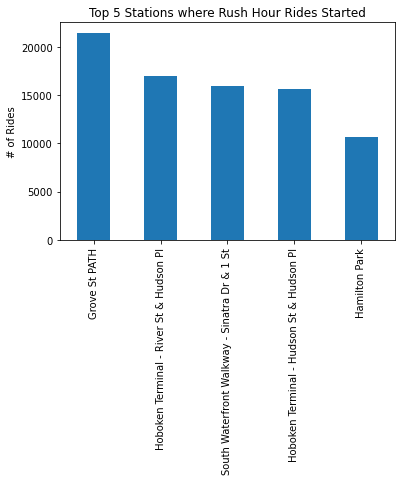

In [11]:
# plot top 5 stations for rush hour and off-hour rides
top_n = 5
rush_hour_counts[:top_n].plot(kind='bar', title='Top 5 Stations where Rush Hour Rides Started', ylabel='# of Rides')
plt.show()

In [33]:
off_hour_counts[:top_n]

Grove St PATH                                   20876
South Waterfront Walkway - Sinatra Dr & 1 St    18054
Hoboken Terminal - River St & Hudson Pl         15620
Hoboken Terminal - Hudson St & Hudson Pl        14808
City Hall - Washington St & 1 St                13303
Name: start_station_name, dtype: int64

Similar to the previous plot, this bar plot shows the top 5 stations where the most rides start during off-hours. Understanding the popular off-hour stations can help identify areas with high demand outside of rush hour and provide insights into different user behavior patterns.

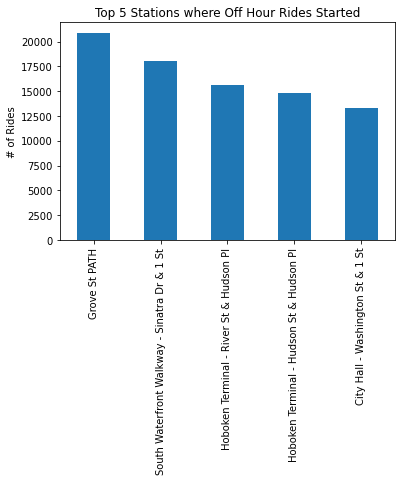

In [12]:
off_hour_counts[:top_n].plot(kind='bar', title='Top 5 Stations where Off Hour Rides Started', ylabel='# of Rides')
plt.show()


In [13]:
# compare rush hour and off-hour distributions
print(stats.ttest_ind(rush_hour_counts, off_hour_counts))
print(stats.kstest(rush_hour_counts, off_hour_counts))
print(stats.mannwhitneyu(rush_hour_counts, off_hour_counts))


Ttest_indResult(statistic=-0.640148240110387, pvalue=0.52295881108915)
KstestResult(statistic=0.14285714285714285, pvalue=0.3597762347141508)
MannwhitneyuResult(statistic=3322.0, pvalue=0.2572318124356094)


In [17]:

df['started_at'] = pd.to_datetime(df['started_at'])

df['month'] = df['started_at'].dt.strftime('%Y-%m')

df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

avg_duration_per_month = df.groupby('month')['duration'].mean()


In [18]:

df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

avg_duration_per_month = df.groupby('month')['duration'].mean()



The output and line plot show the average ride duration per month in seconds. It helps us understand if there are any significant changes in ride durations over time, which could indicate changes in customer behavior or external factors affecting ride durations.

This is consistent with the previous data. During warmer months, casual users will probably bike for fun. The duration is lower.

In [34]:
print("Average Ride Duration Per Month")
for i,val in enumerate(avg_duration_per_month.index):
    print(val,  ": " , avg_duration_per_month)
    
print("col 1: Month")
print("col 2: Ride Duration (seconds)")

Average Ride Duration Per Month
2021-12 :  month
2021-12    1152.612794
2022-01    1475.711307
2022-02     940.787409
2022-03     900.660970
2022-04    1046.978154
2022-05    1181.578949
2022-06    1258.314069
2022-07    1268.495484
2022-08    1050.669342
2022-09     996.240410
2022-10     905.132908
2022-11     772.926515
Name: duration, dtype: float64
2022-01 :  month
2021-12    1152.612794
2022-01    1475.711307
2022-02     940.787409
2022-03     900.660970
2022-04    1046.978154
2022-05    1181.578949
2022-06    1258.314069
2022-07    1268.495484
2022-08    1050.669342
2022-09     996.240410
2022-10     905.132908
2022-11     772.926515
Name: duration, dtype: float64
2022-02 :  month
2021-12    1152.612794
2022-01    1475.711307
2022-02     940.787409
2022-03     900.660970
2022-04    1046.978154
2022-05    1181.578949
2022-06    1258.314069
2022-07    1268.495484
2022-08    1050.669342
2022-09     996.240410
2022-10     905.132908
2022-11     772.926515
Name: duration, dtype: floa

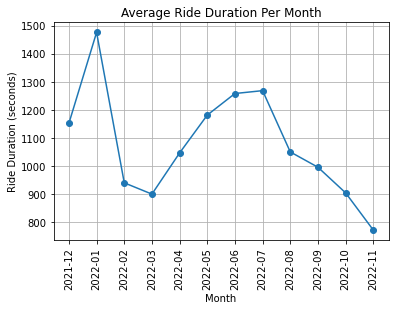

In [19]:
# plot average ride duration per month
plt.plot(avg_duration_per_month.index, avg_duration_per_month, marker='o')
plt.title('Average Ride Duration Per Month')
plt.ylabel('Ride Duration (seconds)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [20]:
# calculate the distance between latitudes and longitudes
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

In [21]:

df['distance'] = haversine(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

In [22]:

avg_distance_per_month = df.groupby('month')['distance'].mean()

In [35]:
print("average distance per month")
for i,val in enumerate(avg_distance_per_month.index):
    print(val,  ": " , avg_distance_per_month)
    
print("col 1: Month")
print("col 2: Ride Distance (km)")

average distance per month
2021-12 :  month
2021-12    1.121491
2022-01    1.082722
2022-02    1.094866
2022-03    1.119538
2022-04    1.152811
2022-05    1.164502
2022-06    1.174724
2022-07    1.176434
2022-08    1.172571
2022-09    1.189690
2022-10    1.173864
2022-11    1.160138
Name: distance, dtype: float64
2022-01 :  month
2021-12    1.121491
2022-01    1.082722
2022-02    1.094866
2022-03    1.119538
2022-04    1.152811
2022-05    1.164502
2022-06    1.174724
2022-07    1.176434
2022-08    1.172571
2022-09    1.189690
2022-10    1.173864
2022-11    1.160138
Name: distance, dtype: float64
2022-02 :  month
2021-12    1.121491
2022-01    1.082722
2022-02    1.094866
2022-03    1.119538
2022-04    1.152811
2022-05    1.164502
2022-06    1.174724
2022-07    1.176434
2022-08    1.172571
2022-09    1.189690
2022-10    1.173864
2022-11    1.160138
Name: distance, dtype: float64
2022-03 :  month
2021-12    1.121491
2022-01    1.082722
2022-02    1.094866
2022-03    1.119538
2022-04    1

Weird. Duration decreases but distance increased! Possible data errors.

In [36]:
df['rideable_type'].value_counts()

classic_bike     623653
electric_bike    263303
docked_bike        7965
Name: rideable_type, dtype: int64

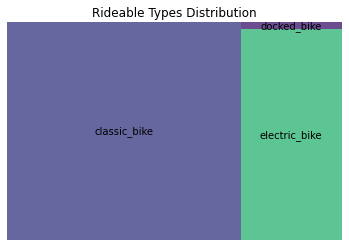

In [25]:
# create treemaps for rideable types
rideable_type_counts = df['rideable_type'].value_counts()
squarify.plot(sizes=rideable_type_counts, label=rideable_type_counts.index, alpha=.8)
plt.title('Rideable Types Distribution')
plt.axis('off')
plt.show()


Month analysis

In [ ]:

months = [
    '202112', '202201', '202202', '202203',
    '202204', '202205', '202206', '202207',
    '202208', '202209', '202210', '202211'
]

dfs = []

for month in months:
    df = pd.read_csv(f'data/JC-{month}-citibike-tripdata.csv')
    dfs.append(df)

In [ ]:

df = pd.concat(dfs)


df = df.reset_index(drop=True)

# analyzing differences in rush hour vs off hour bike rides
rush_hour_morning = df.loc[(pd.to_datetime(df['started_at']).dt.hour >= 7) & (pd.to_datetime(df['started_at']).dt.hour <= 9)]
rush_hour_evening = df.loc[(pd.to_datetime(df['started_at']).dt.hour >= 16) & (pd.to_datetime(df['started_at']).dt.hour <= 19)]
rush_hour_df = pd.concat([rush_hour_morning, rush_hour_evening])

off_hour_df = df.loc[~df.index.isin(rush_hour_df.index)]

rush_hour_counts = rush_hour_df['start_station_name'].value_counts()
off_hour_counts = off_hour_df['start_station_name'].value_counts()

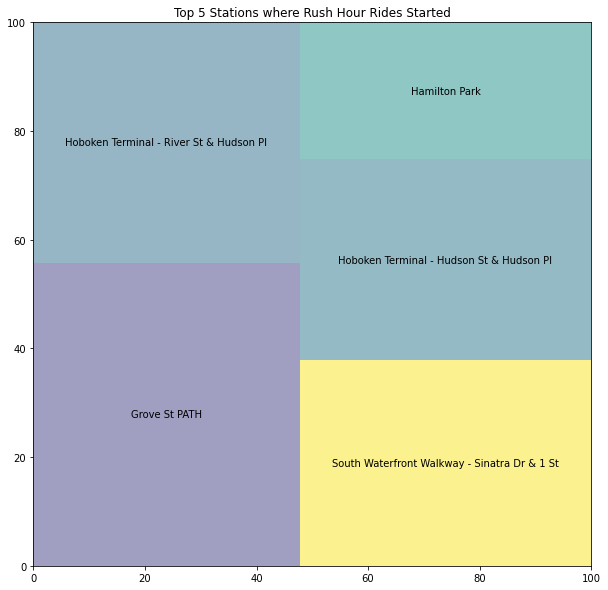

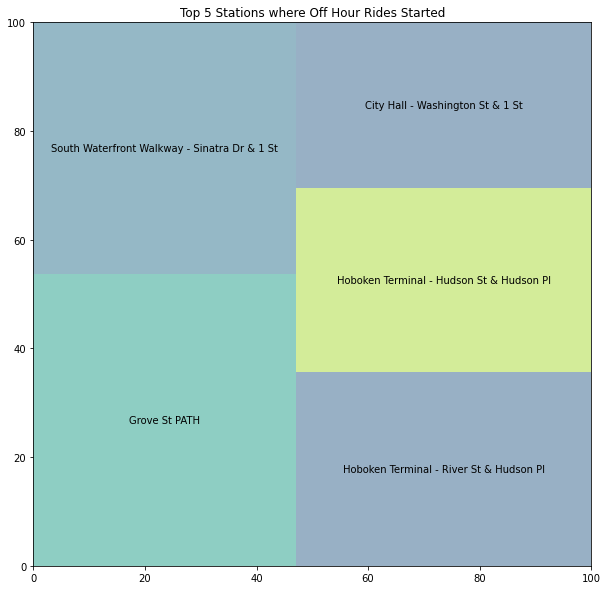

In [28]:
# computing and visualizing the rush hour and off hour traffic for each station
plt.figure(figsize=(10,10))
squarify.plot(rush_hour_counts[:5], label=rush_hour_counts.index[:5], text_kwargs={'fontsize':10}, alpha=.5)
plt.title('Top 5 Stations where Rush Hour Rides Started')
plt.show()

plt.figure(figsize=(10,10))
squarify.plot(off_hour_counts[:5], label=off_hour_counts.index[:5], text_kwargs={'fontsize':10}, alpha=.5)
plt.title('Top 5 Stations where Off Hour Rides Started')
plt.show()